<a href="https://colab.research.google.com/github/ksmk247/Covid-19-Analysis/blob/main/Covid_19_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

This project focuses on analyzing and visualizing data using fundamental Python libraries for data science.

It utilizes:
- pandas: A powerful library for data manipulation and analysis, providing data structures like DataFrames.
- numpy: A foundational library for numerical computing in Python, offering support for arrays and mathematical functions.
- matplotlib.pyplot: A plotting library used for creating static, interactive, and animated visualizations in Python.
- seaborn: A statistical data visualization library based on matplotlib, providing a high-level interface for drawing attractive and informative statistical graphics.
- datetime: A built-in Python module for working with dates and times.

The project aims to perform tasks such as data loading, cleaning, transformation, statistical analysis, and creating various types of plots to gain insights from the data.
Specific analyses and visualizations will be implemented in subsequent code cells.


In [ ]:
df = pd.read_csv("covid_19_india.csv")
df.dropna(inplace=True)

df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['ConfirmedIndianNational'] = pd.to_numeric(df['ConfirmedIndianNational'], errors='coerce').fillna(0)
df['ConfirmedForeignNational'] = pd.to_numeric(df['ConfirmedForeignNational'], errors='coerce').fillna(0)

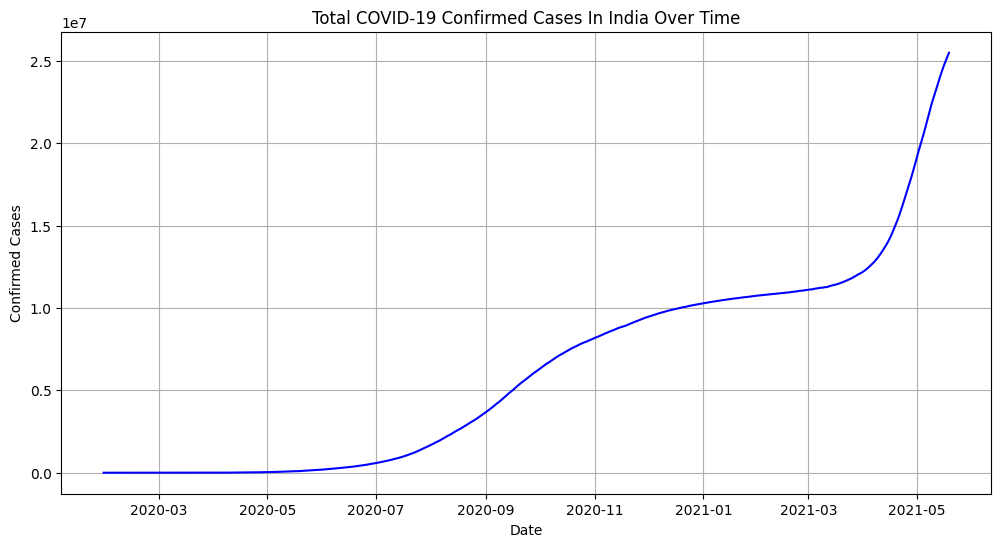

In [ ]:
total_cases = df.groupby("Date")["Confirmed"].sum().reset_index()
plt.figure(figsize=(12,6))
plt.plot(total_cases["Date"], total_cases["Confirmed"], color = 'blue')
plt.title("Total COVID-19 Confirmed Cases In India Over Time")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.grid(True)
plt.show()

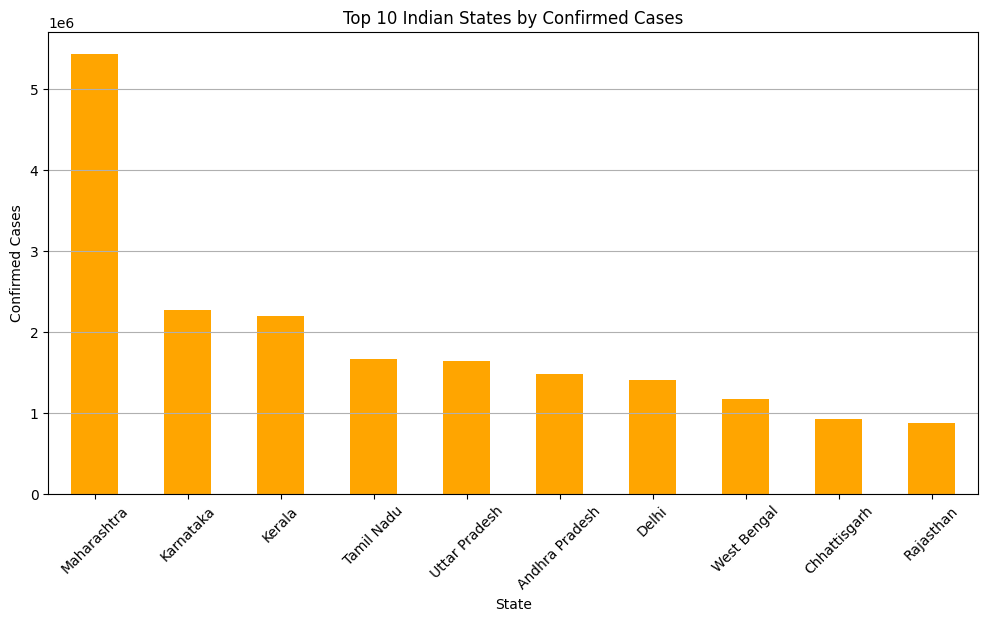

In [ ]:
latest_date = df["Date"].max()
latest_df = df[df["Date"] == latest_date]
top_states = latest_df.groupby("State/UnionTerritory")["Confirmed"].sum().sort_values(ascending=False).head(10)
top_states.plot(kind = "bar", figsize=(12,6), color='orange')
plt.title("Top 10 Indian States by Confirmed Cases")
plt.xlabel("State")
plt.ylabel("Confirmed Cases")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

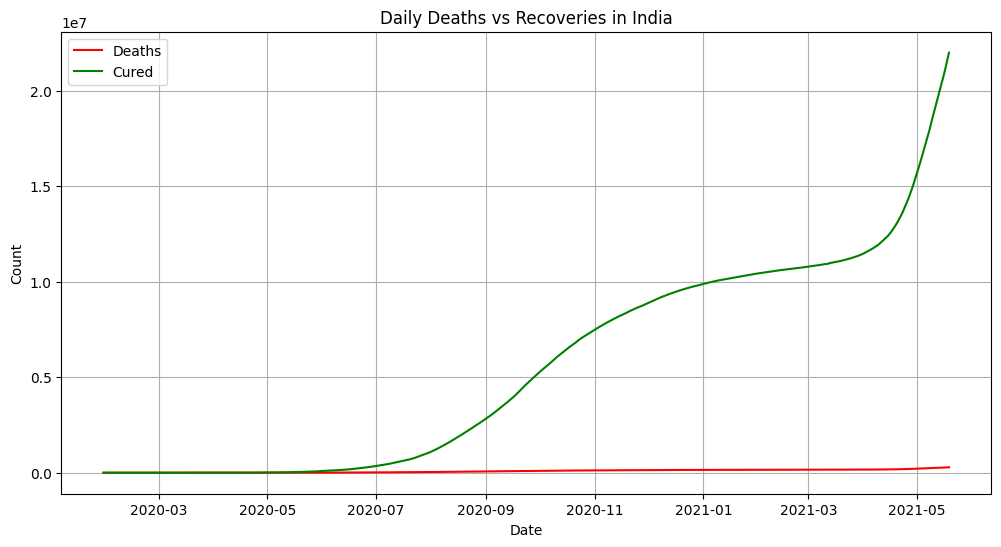

In [ ]:
daily_df = df.groupby("Date")[["Deaths", "Cured"]].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(daily_df["Date"], daily_df["Deaths"], label='Deaths', color='red')
plt.plot(daily_df["Date"], daily_df["Cured"], label='Cured', color='green')
plt.title("Daily Deaths vs Recoveries in India")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.grid(True)plt.show()

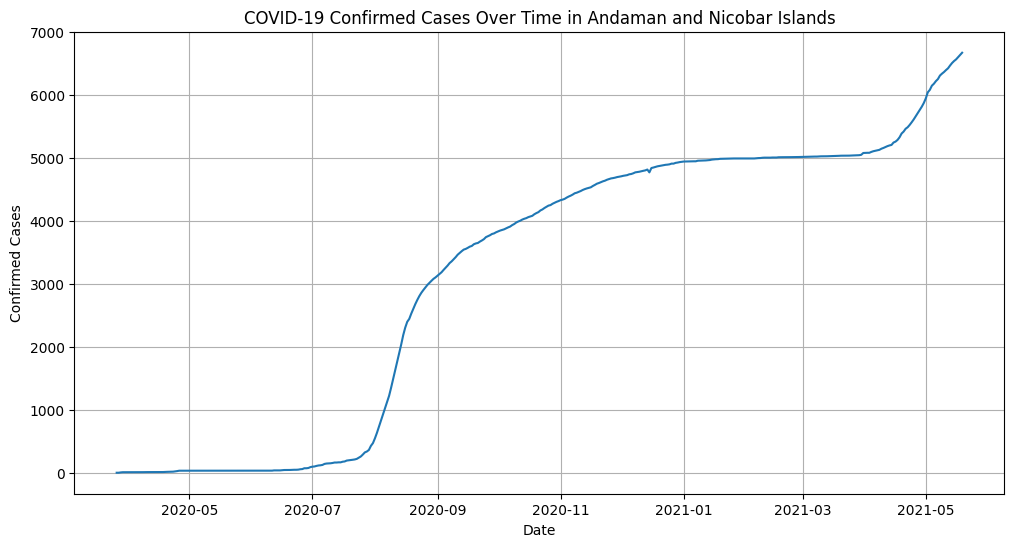

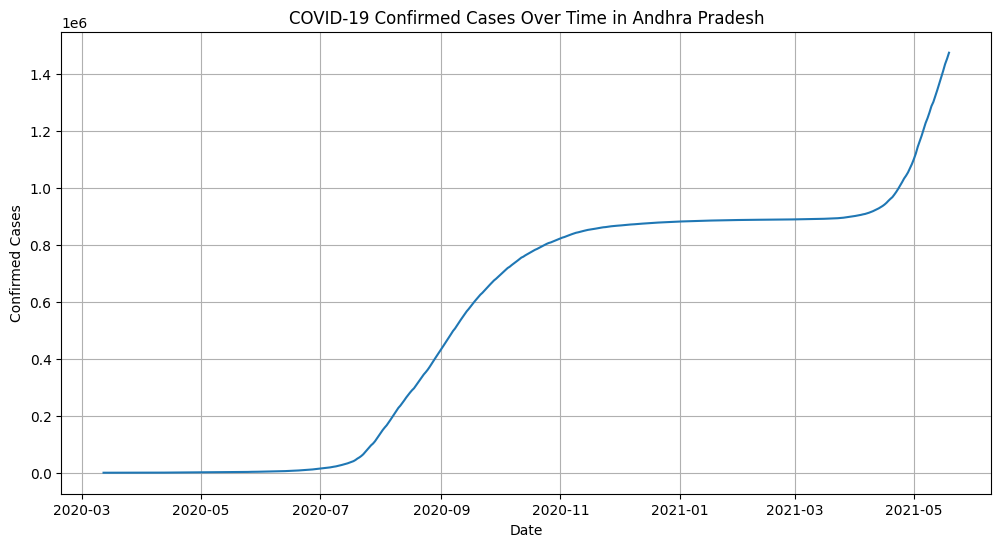

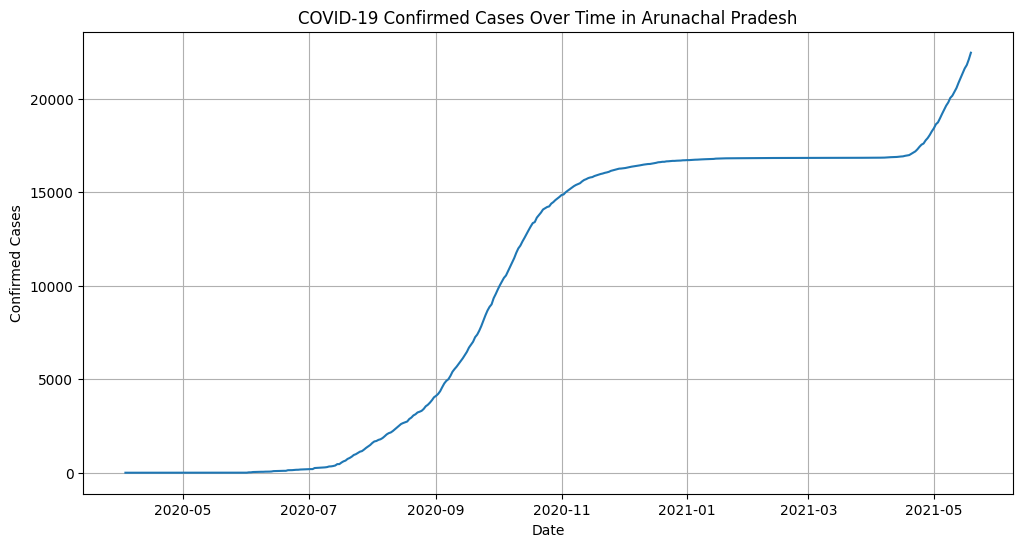

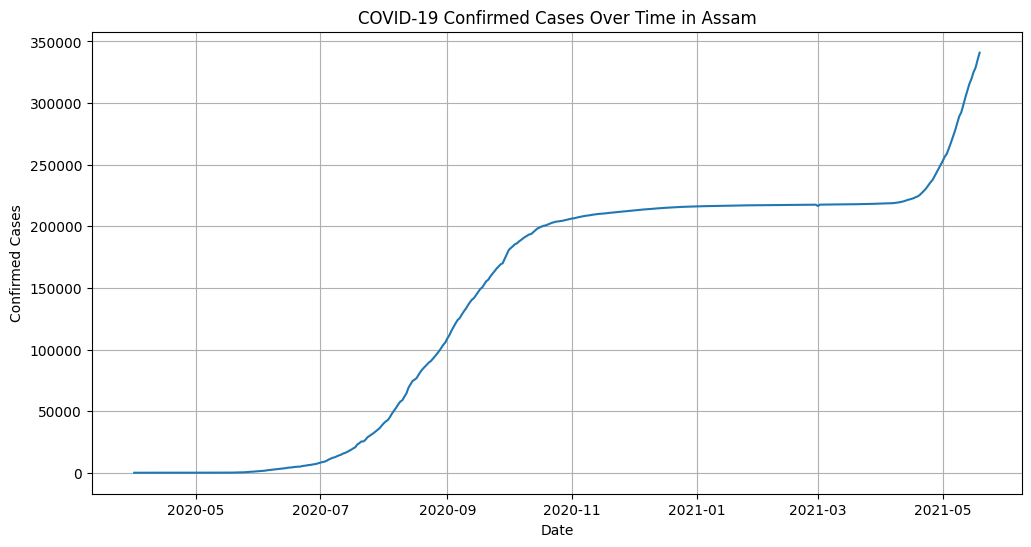

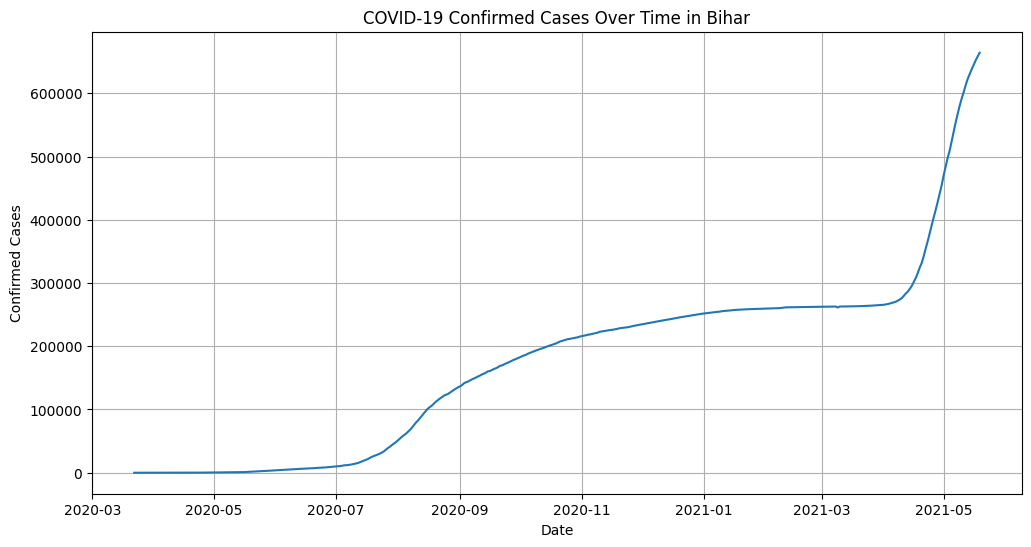

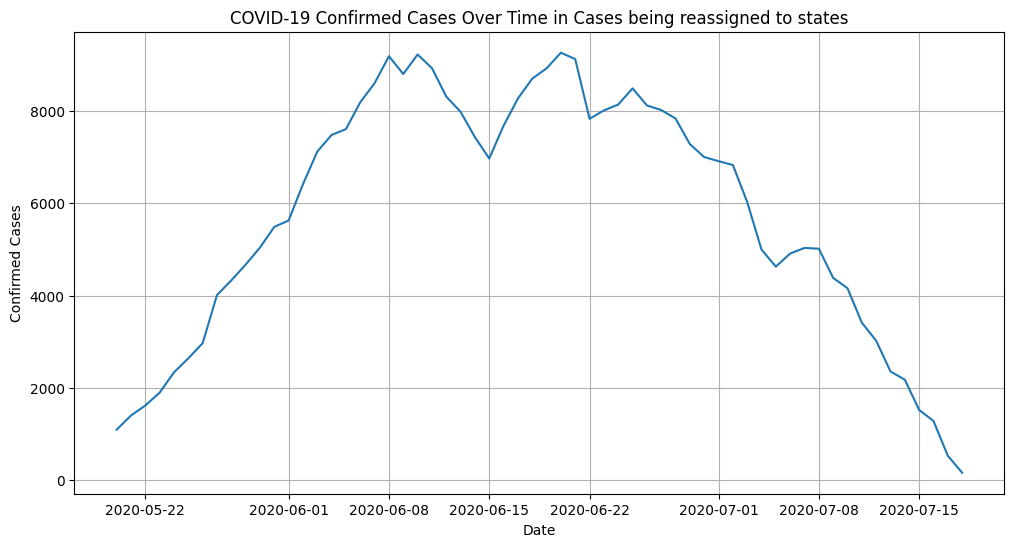

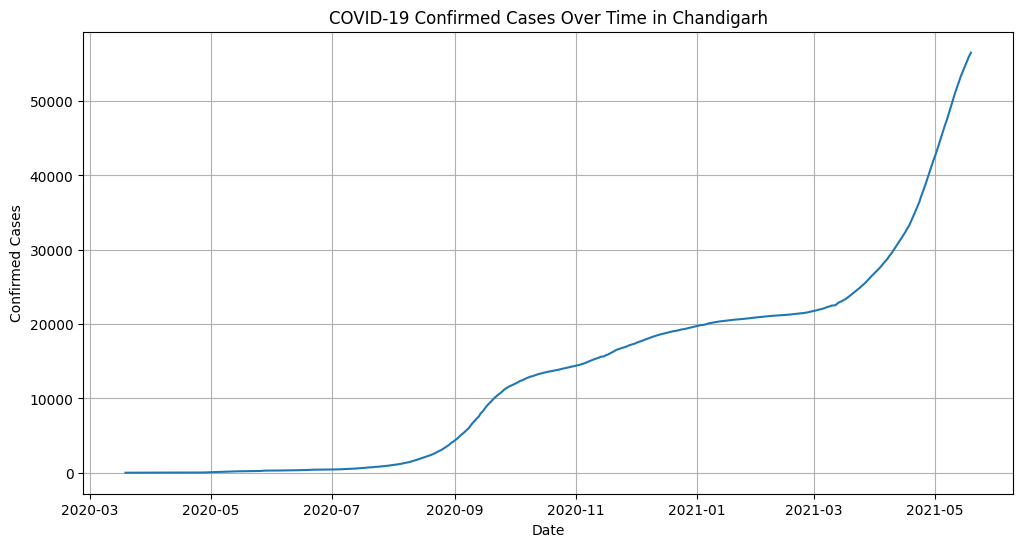

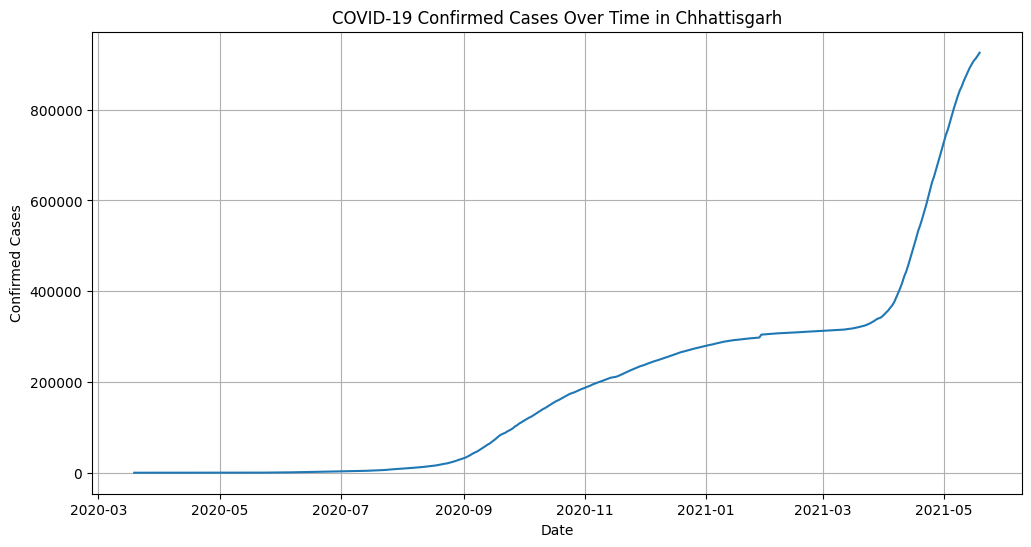

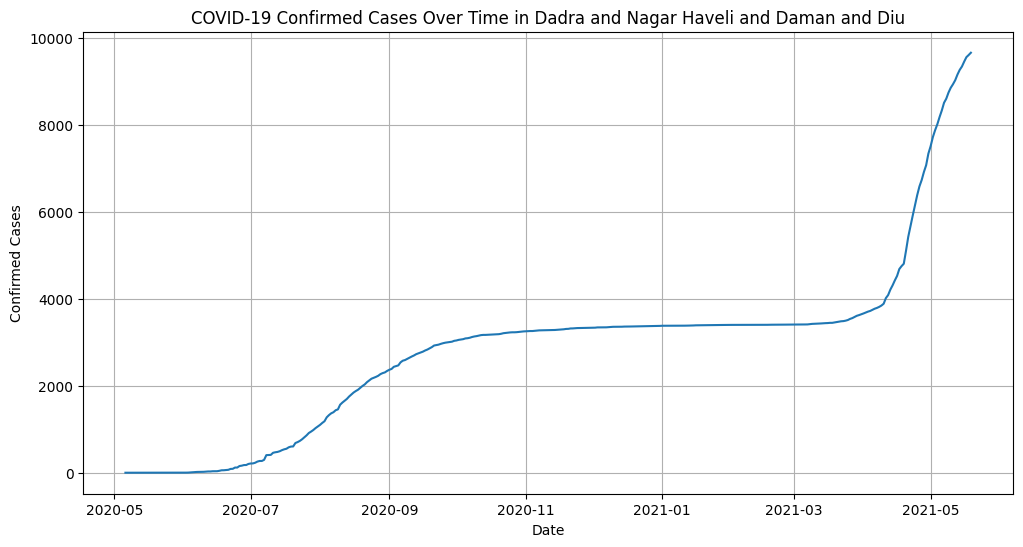

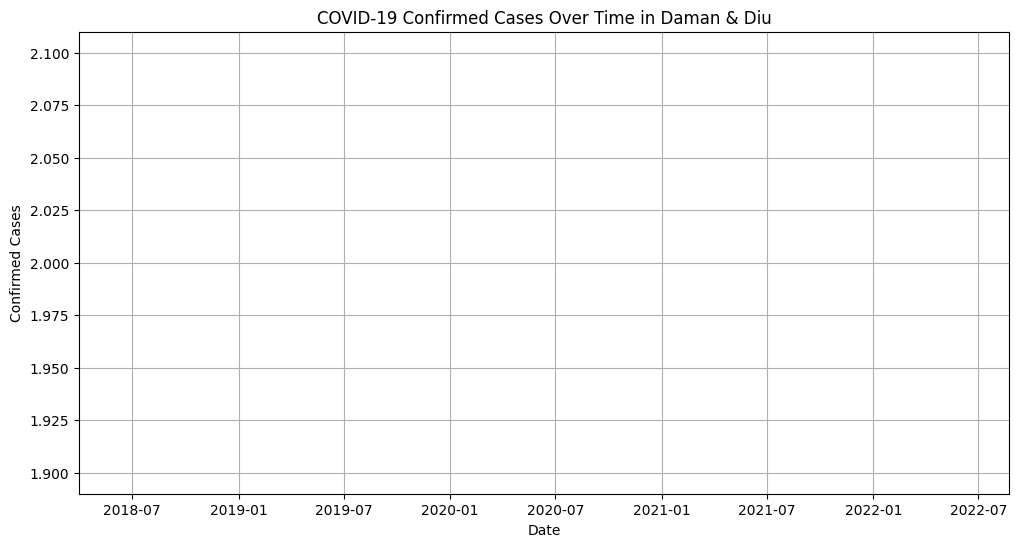

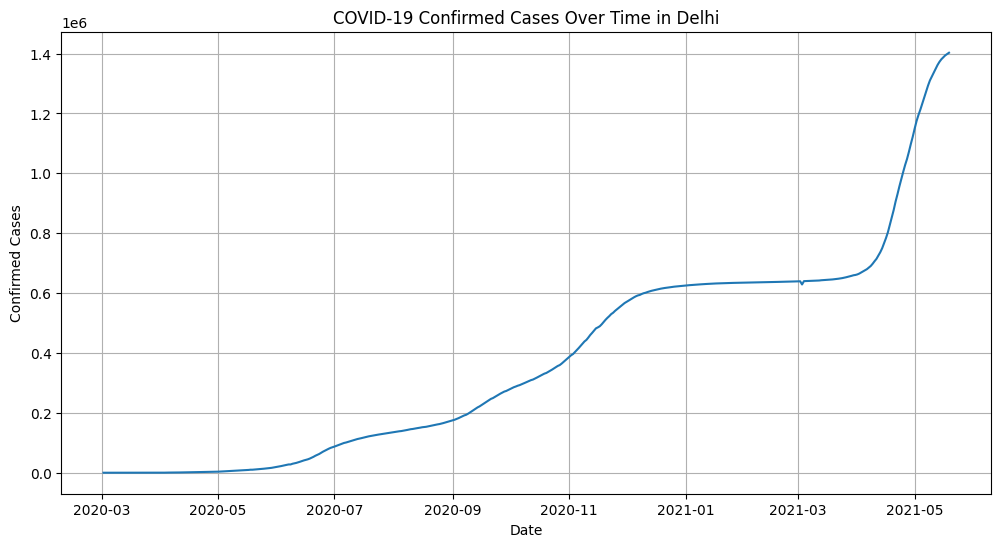

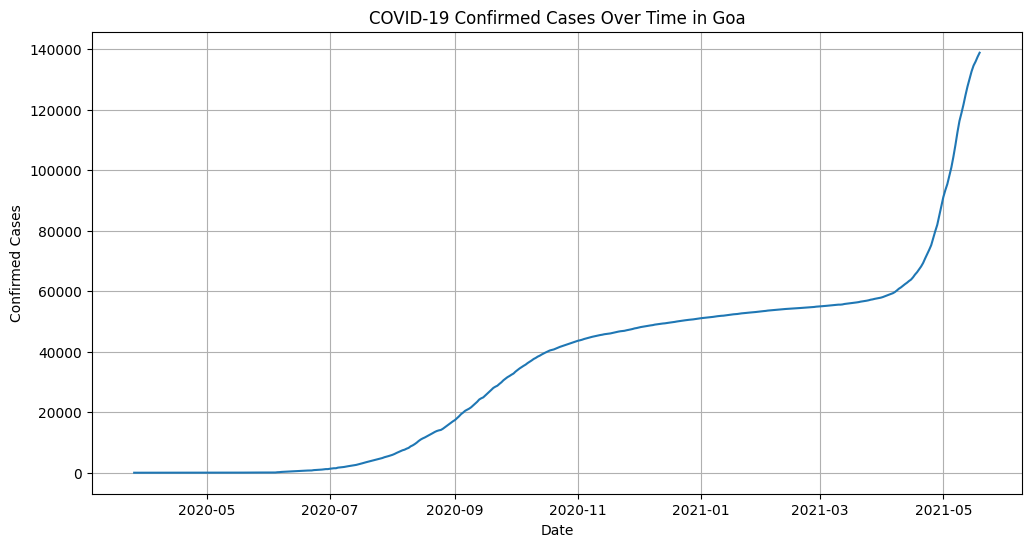

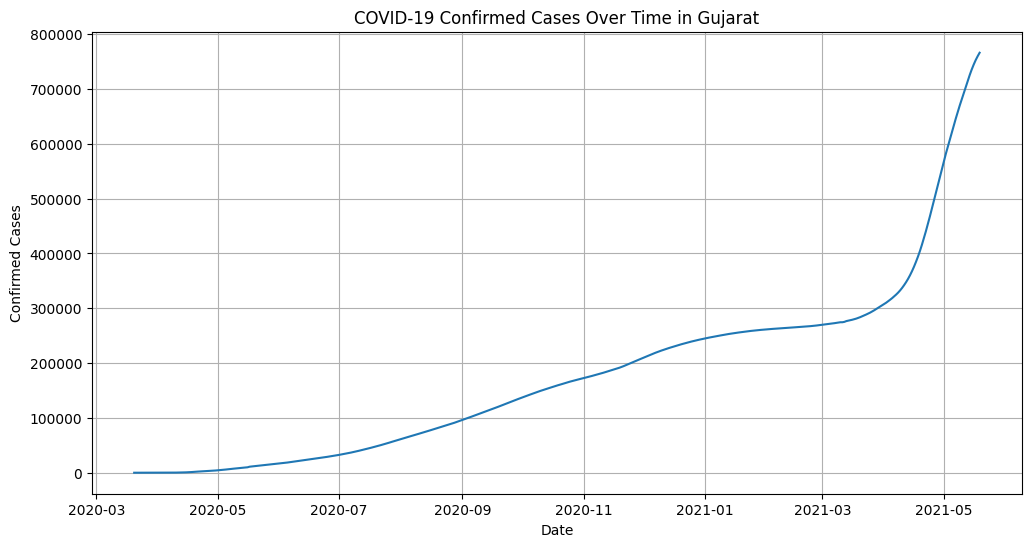

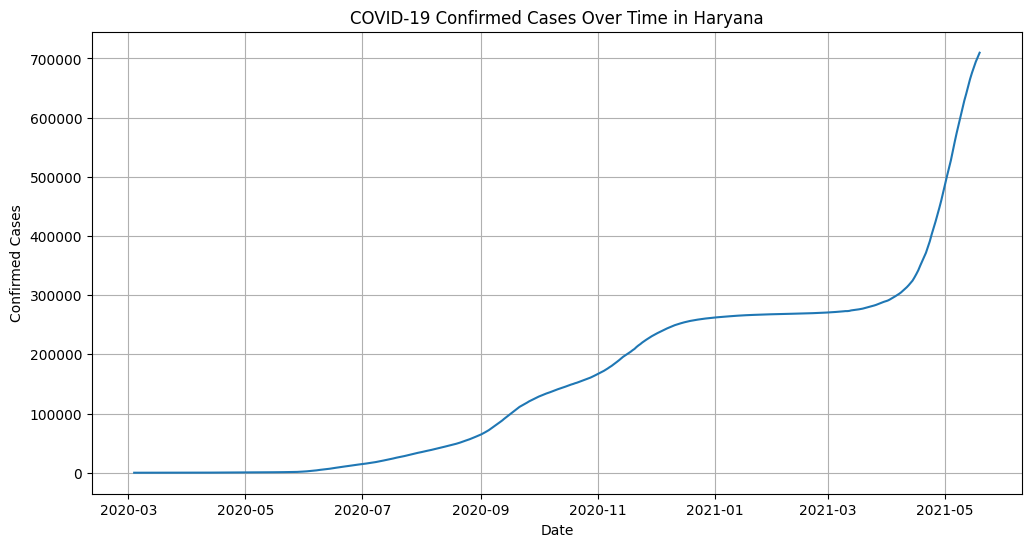

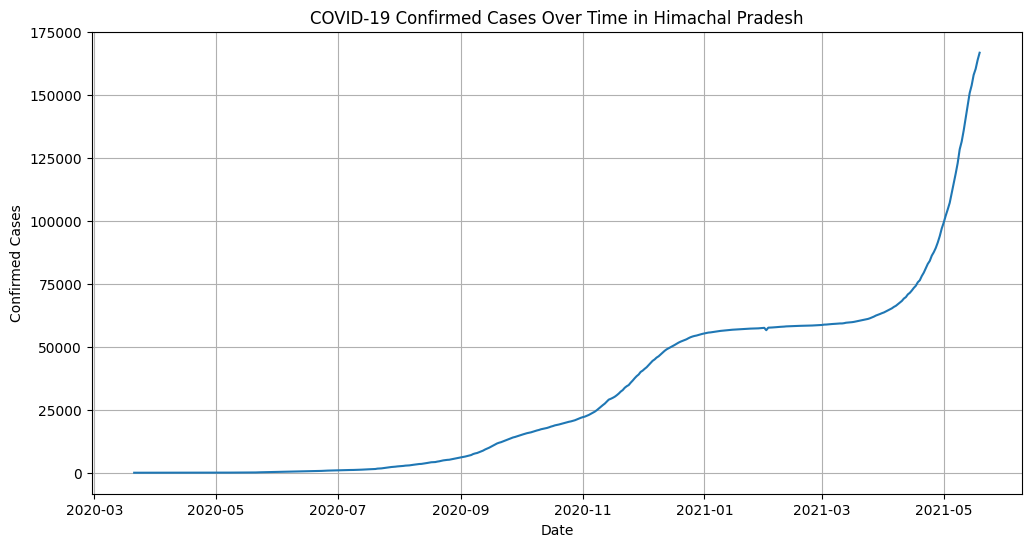

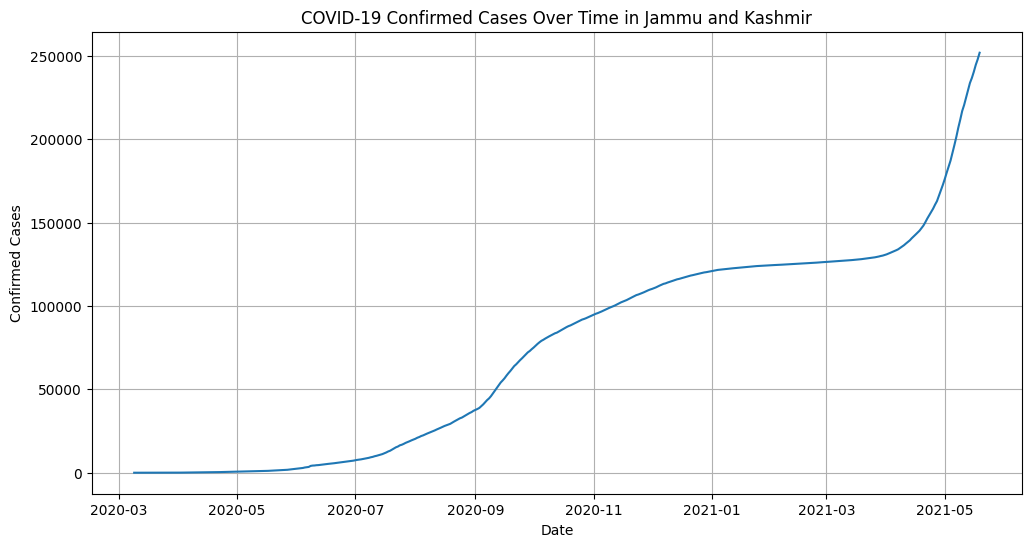

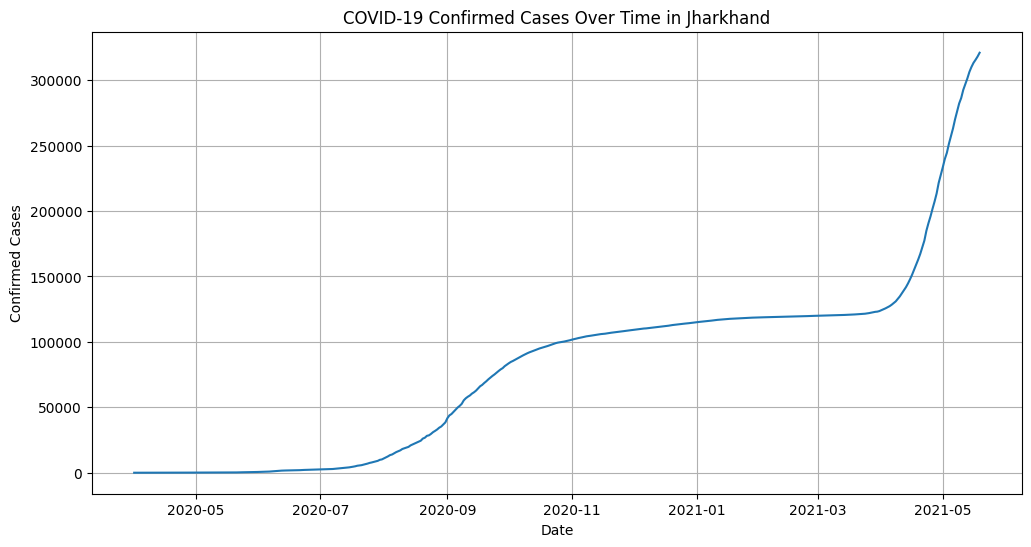

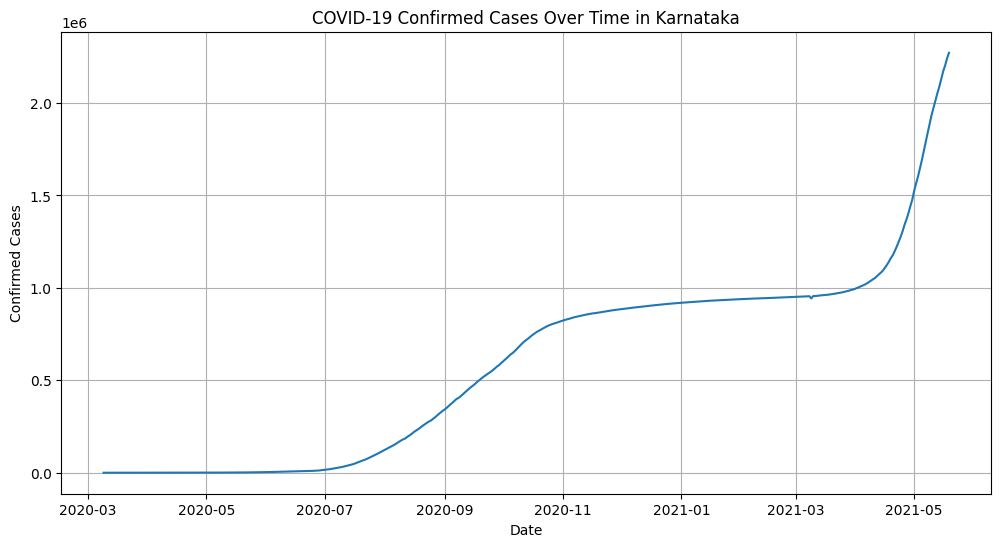

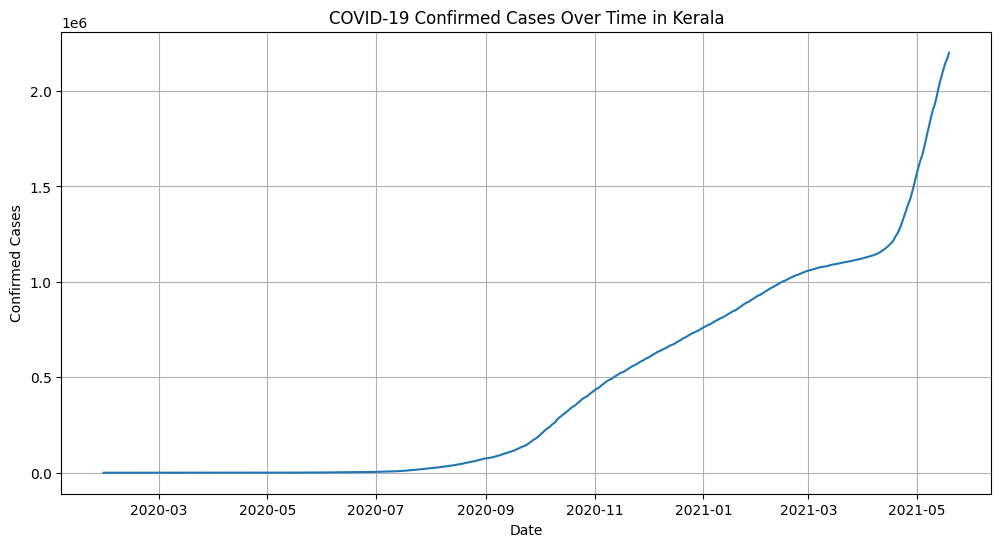

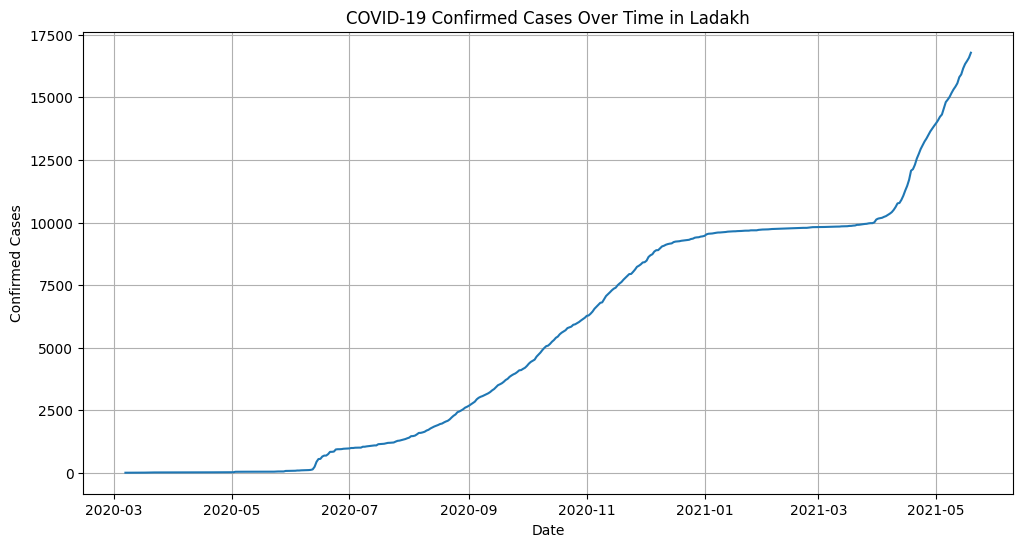

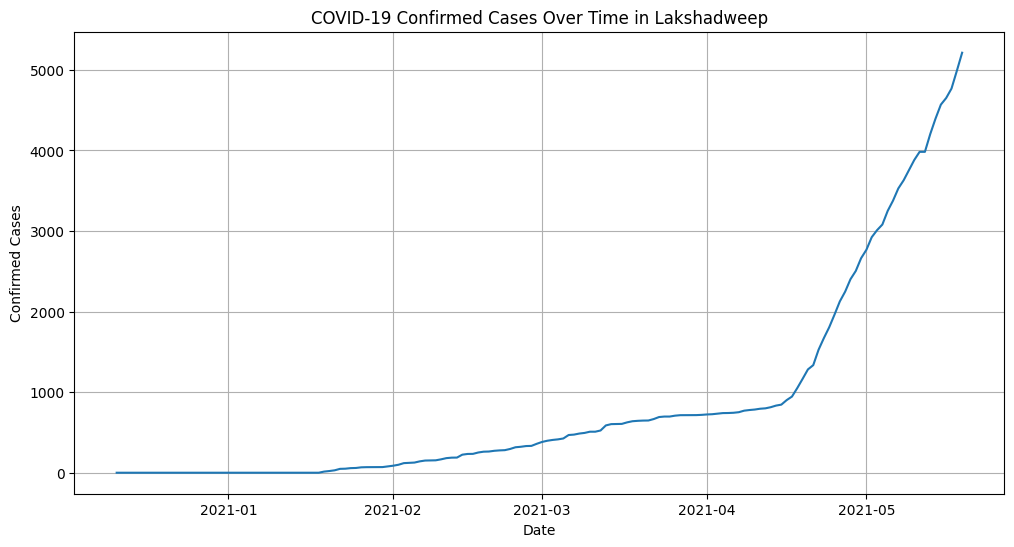

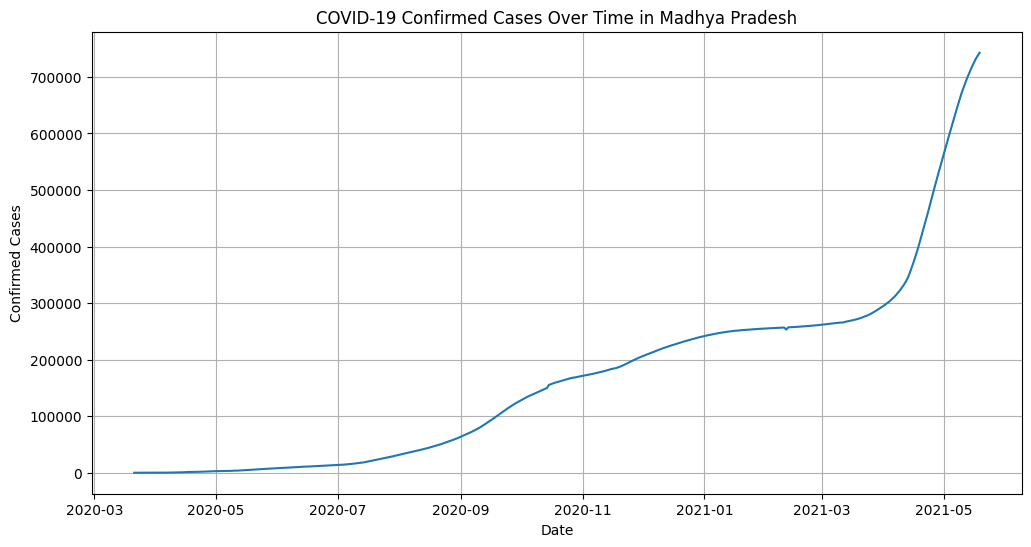

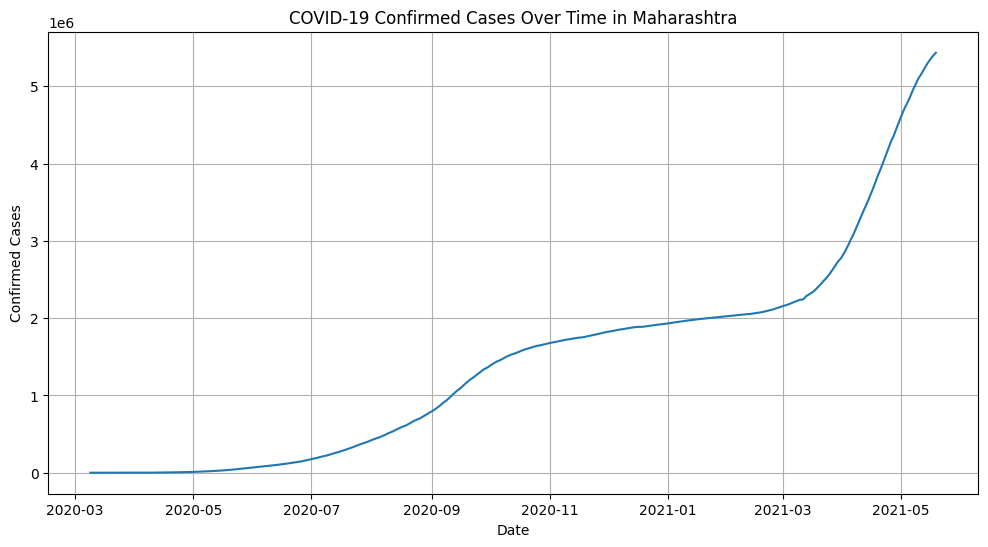

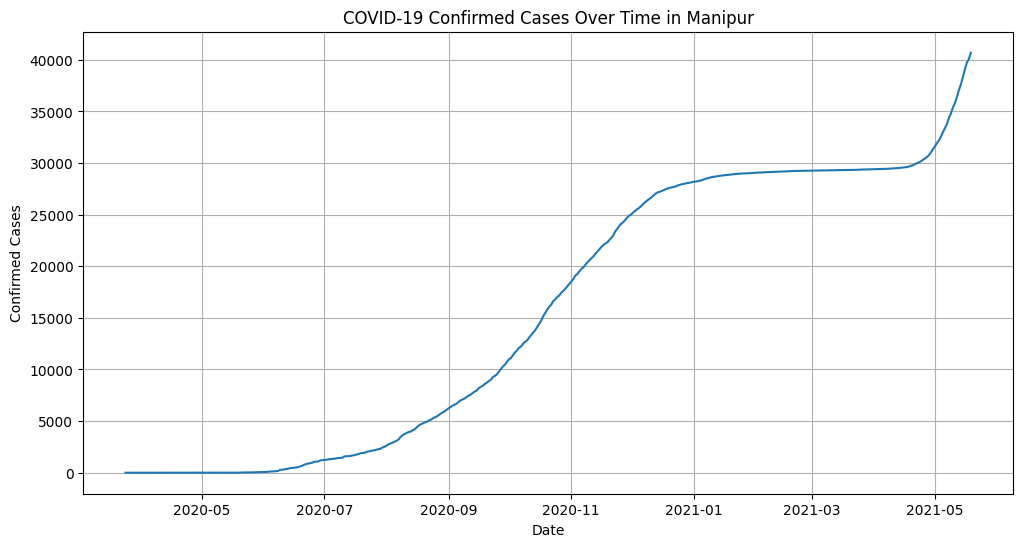

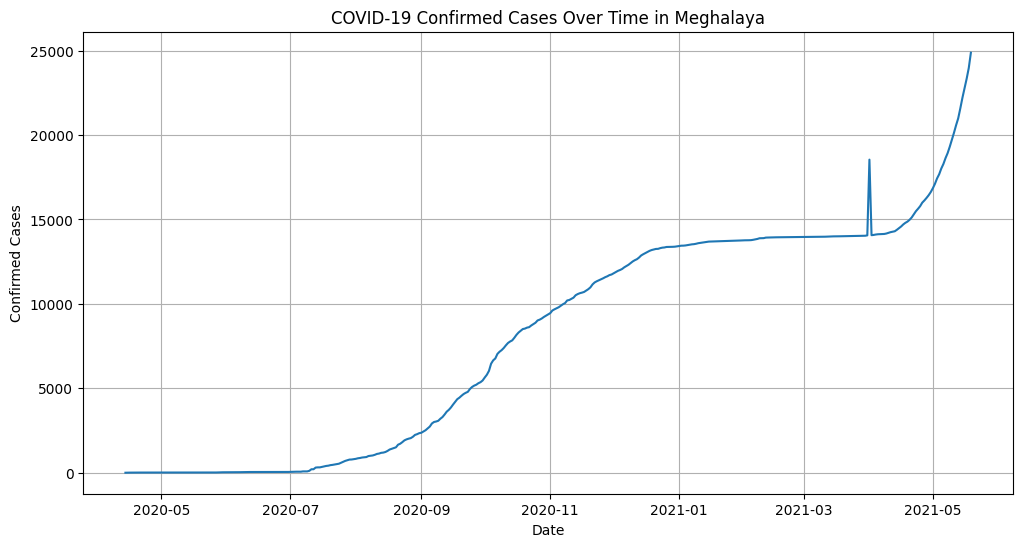

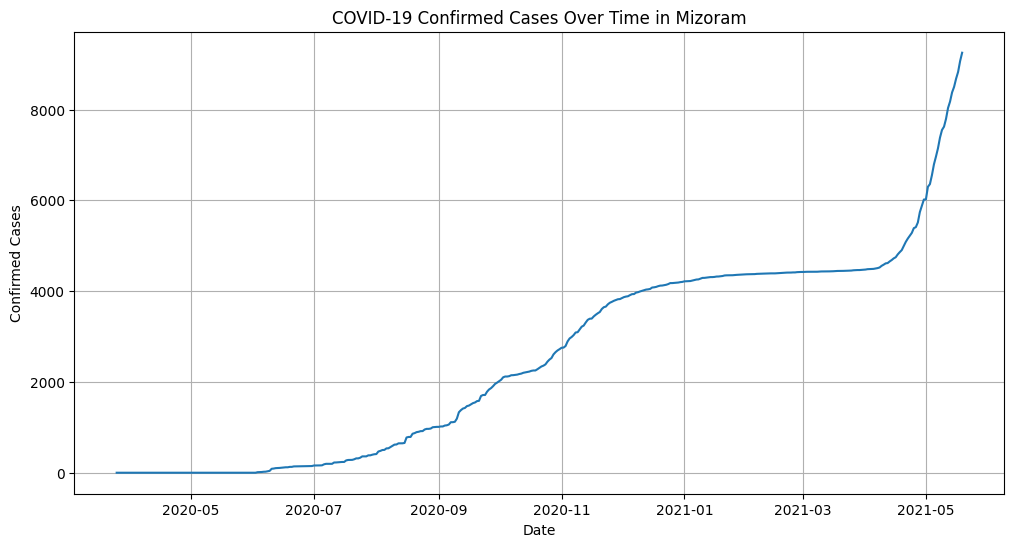

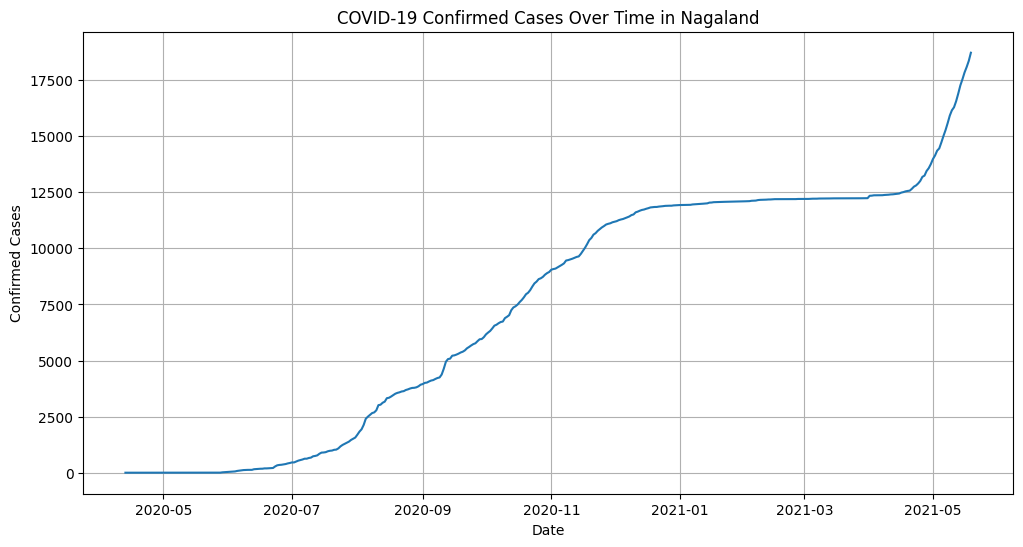

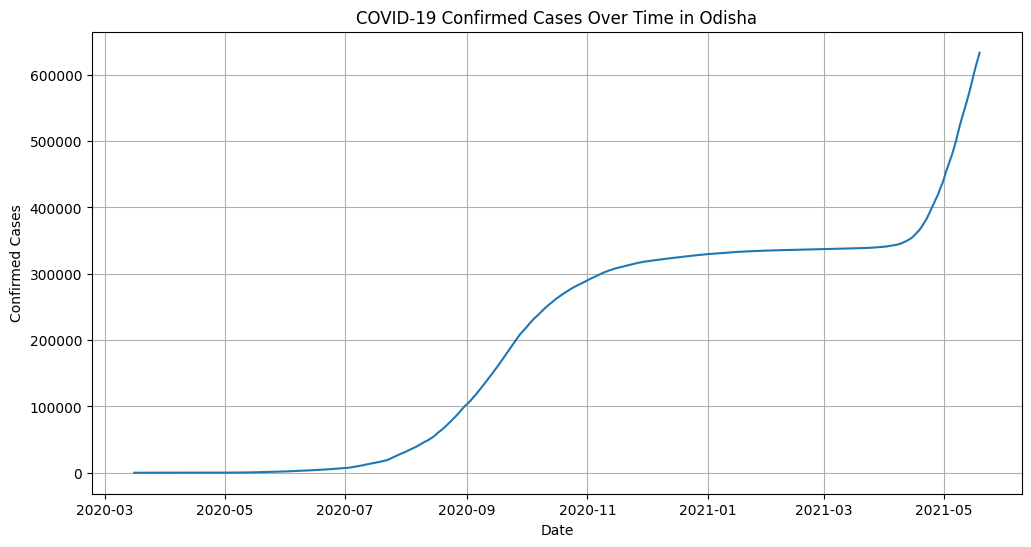

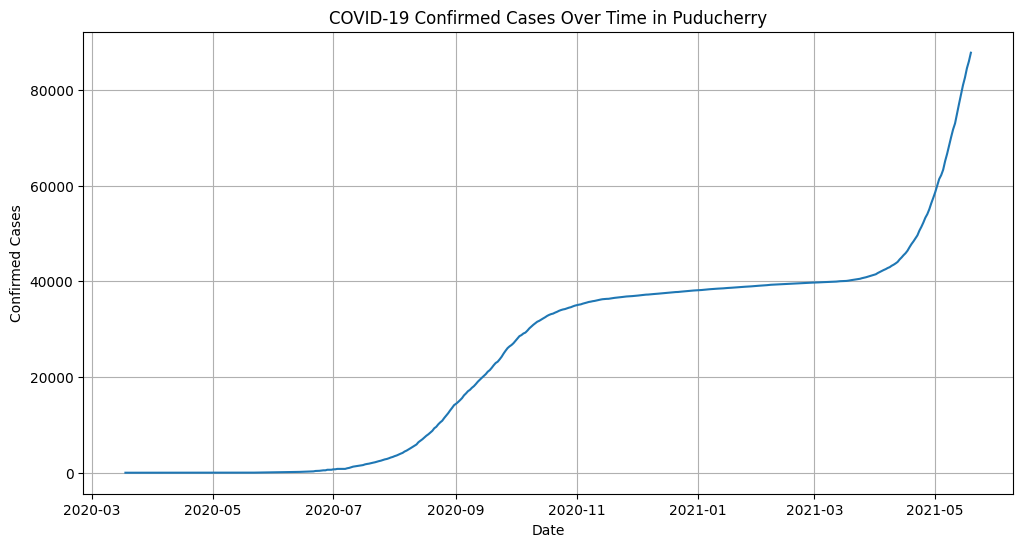

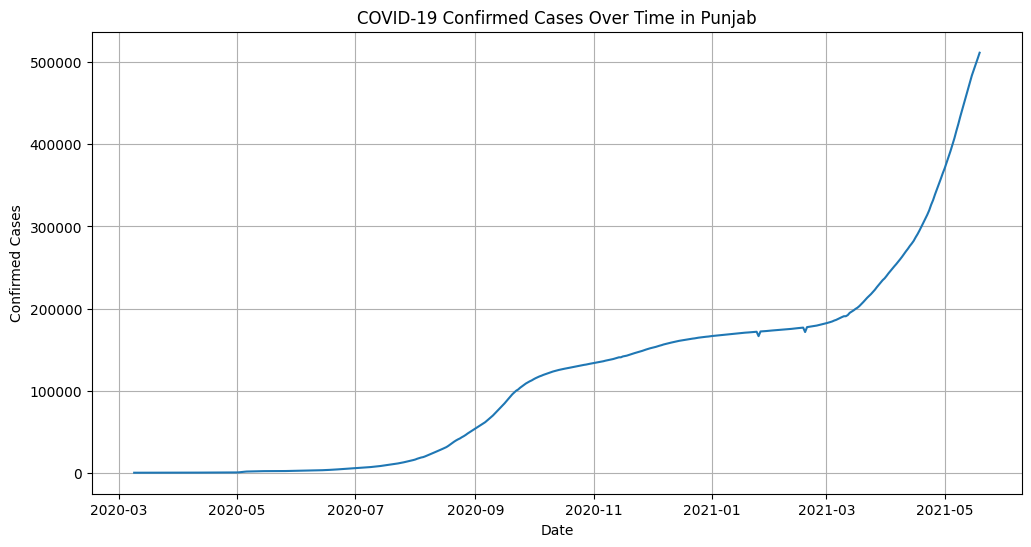

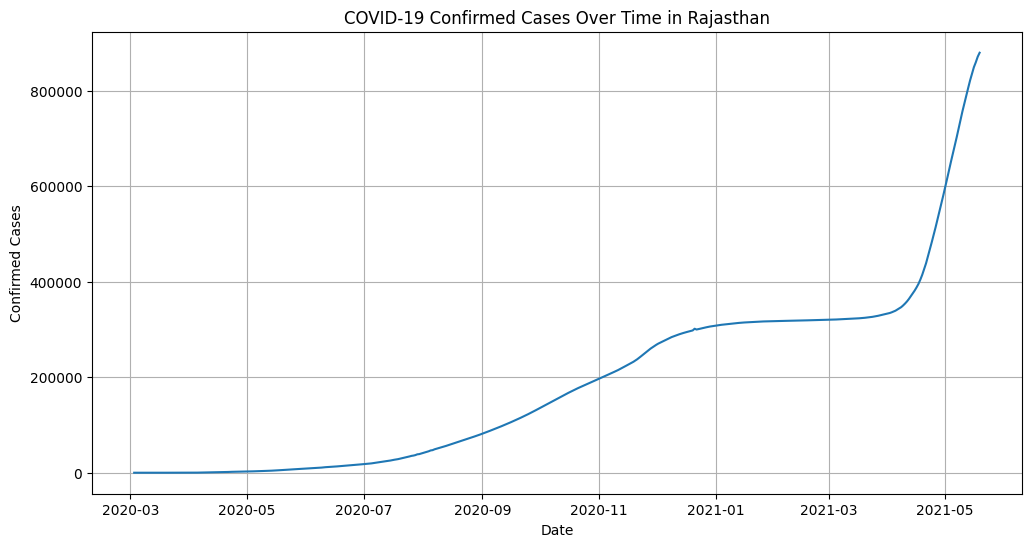

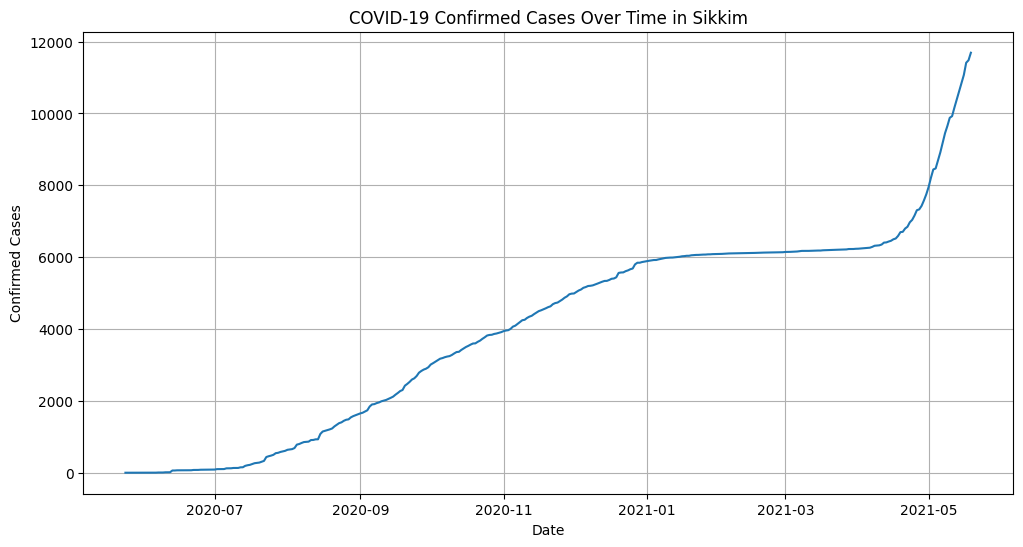

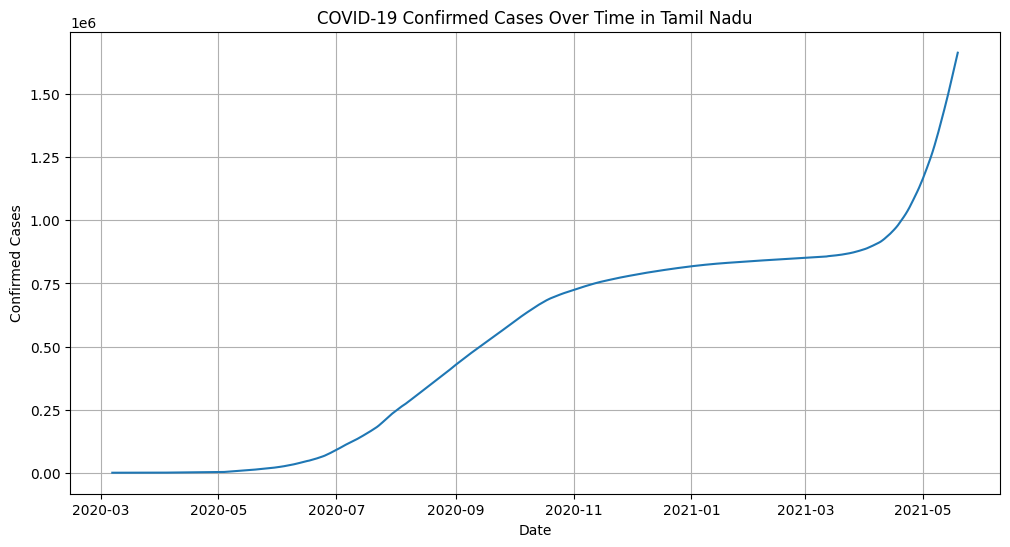

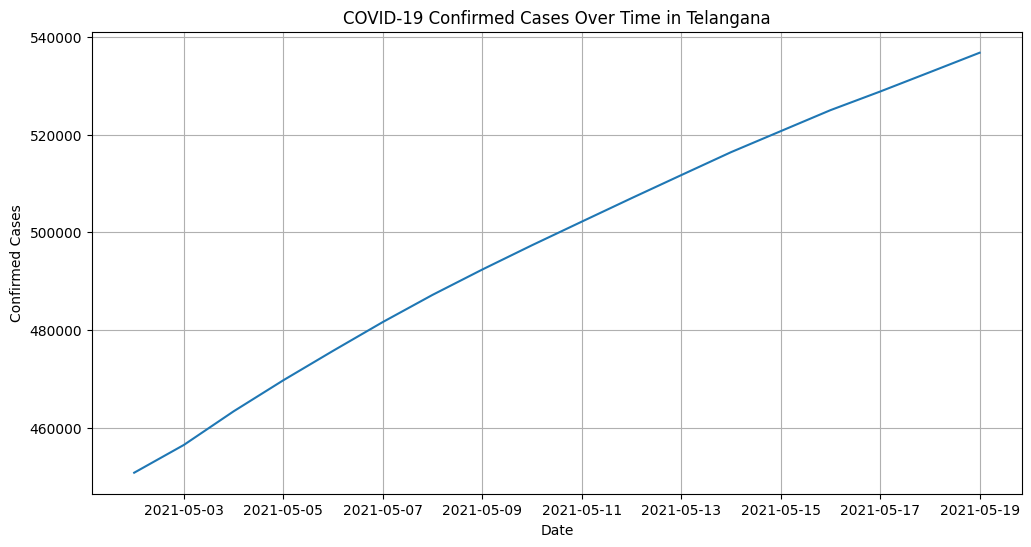

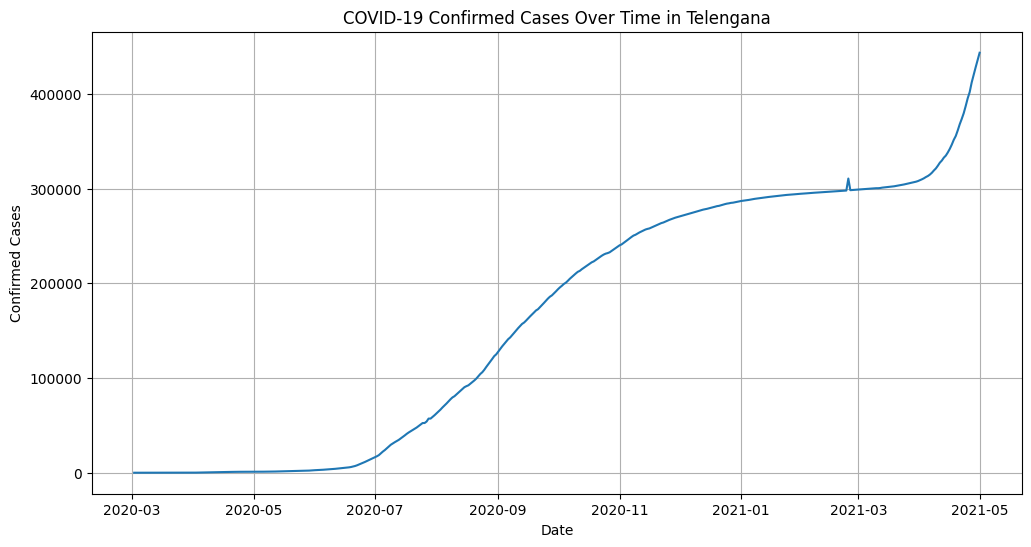

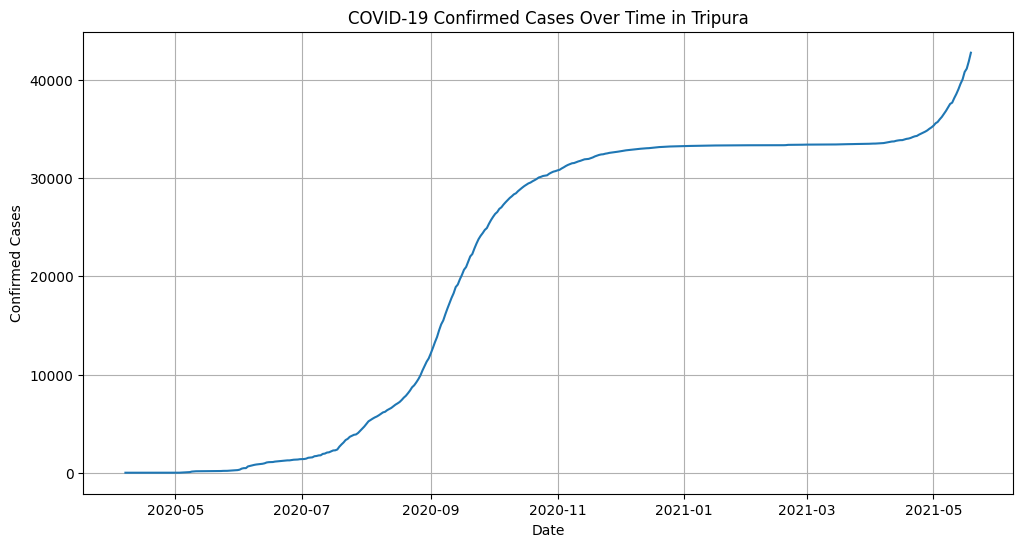

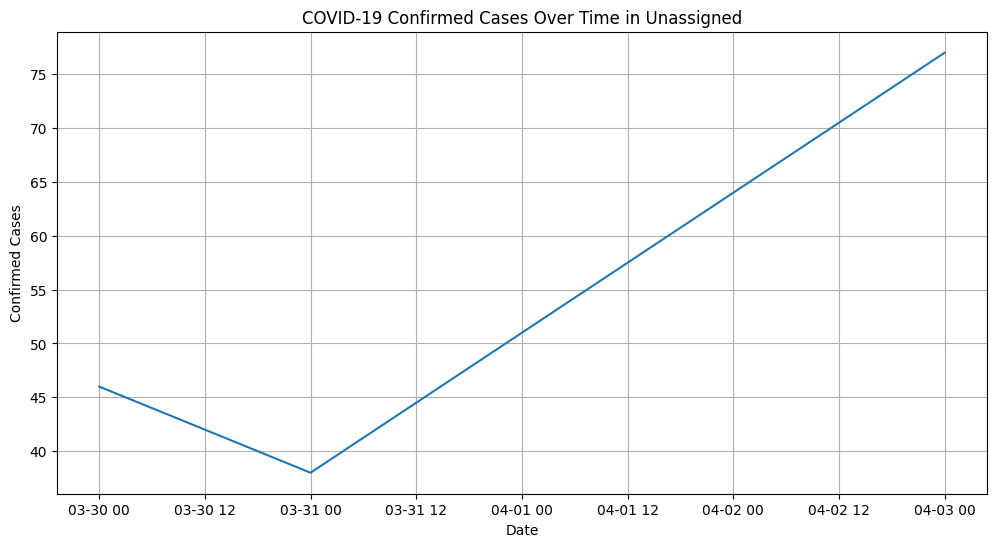

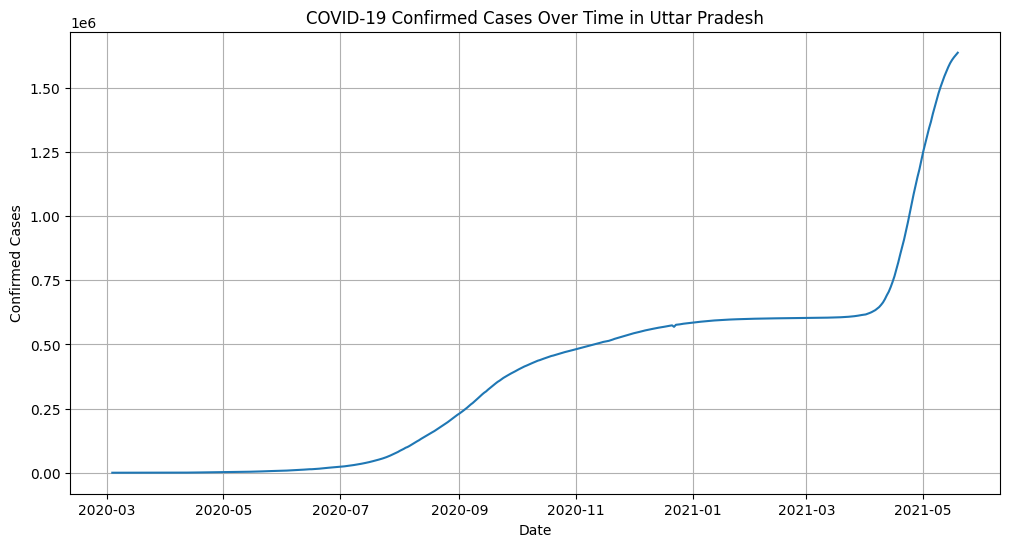

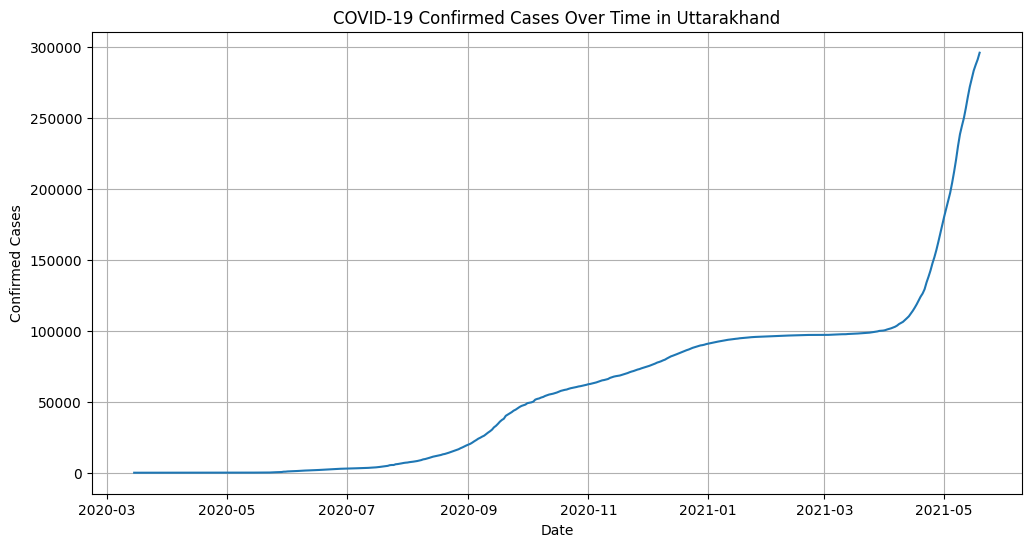

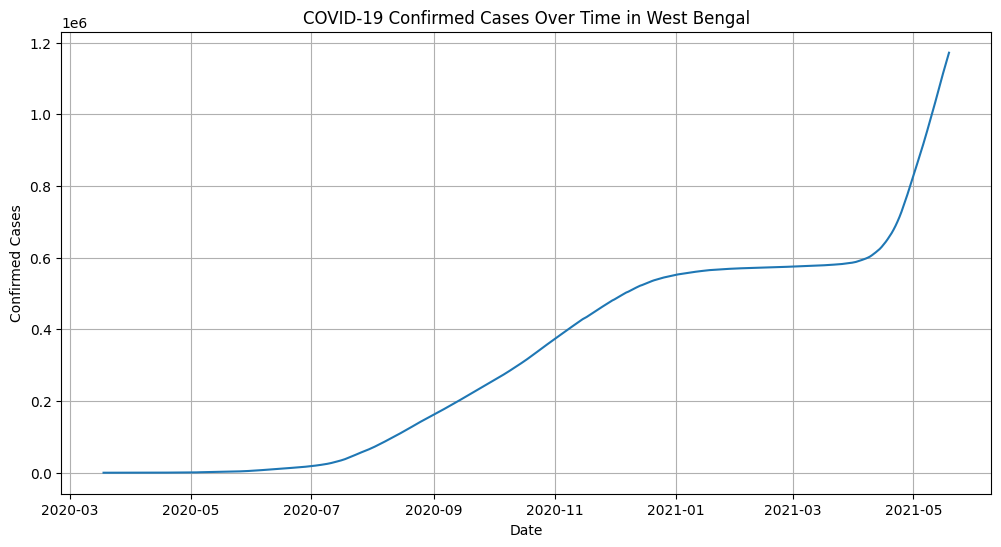

In [ ]:
state_daily_cases = df.groupby(['State/UnionTerritory', 'Date'])['Confirmed'].sum().reset_index()
states = state_daily_cases['State/UnionTerritory'].unique()
for state in states:
    state_data = state_daily_cases[state_daily_cases['State/UnionTerritory'] == state]
    plt.figure(figsize=(12, 6))
    plt.plot(state_data['Date'], state_data['Confirmed'])
    plt.title(f'COVID-19 Confirmed Cases Over Time in {state}')
    plt.xlabel('Date')
    plt.ylabel('Confirmed Cases')
    plt.grid(True)
    plt.show()

# Task
Analyze the provided COVID-19 dataset for India to identify and visualize new features and trends, including daily new cases, deaths, and recoveries, state-wise comparisons, active cases, and correlations between features.

## Analyze daily new cases

### Subtask:
Calculate and visualize the daily new confirmed cases across India.


**Reasoning**:
Calculate the daily new confirmed cases across India and plot the results as instructed.



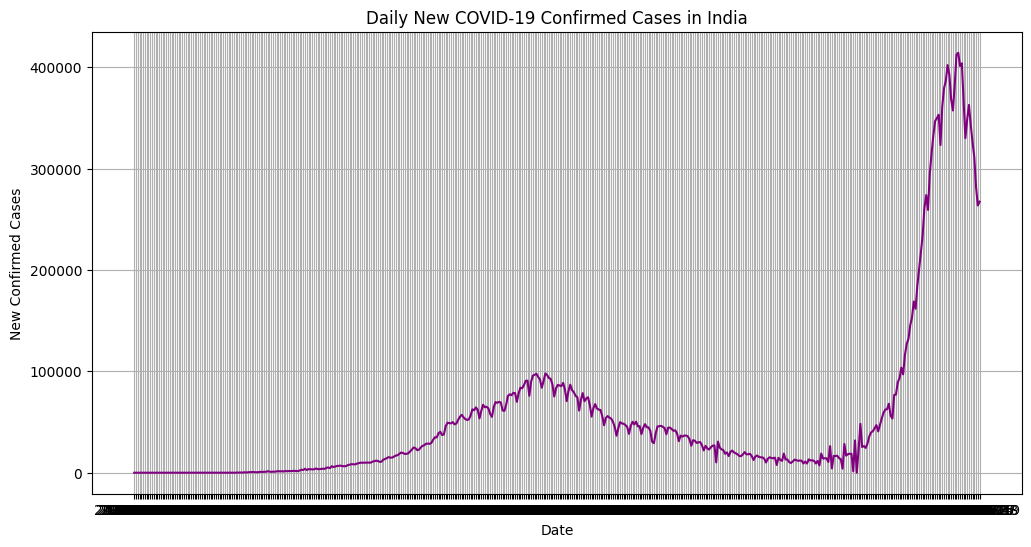

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("covid_19_india.csv")
daily_confirmed = df.groupby("Date")["Confirmed"].sum().diff().fillna(0).reset_index()
daily_confirmed.columns = ["Date", "New Confirmed Cases"]

plt.figure(figsize=(12, 6))
plt.plot(daily_confirmed["Date"], daily_confirmed["New Confirmed Cases"], color='purple')
plt.title("Daily New COVID-19 Confirmed Cases in India")
plt.xlabel("Date")
plt.ylabel("New Confirmed Cases")
plt.grid(True)
plt.show()

**Reasoning**:
The error indicates that the DataFrame `df` was not defined in the current execution context. I will regenerate the code block including the data loading and preprocessing steps to ensure `df` is available before calculating and plotting the daily new cases.



## Analyze daily new deaths

### Subtask:
Calculate and visualize the daily new deaths across India.

**Reasoning**:
Calculate the daily new deaths across India and plot the results.

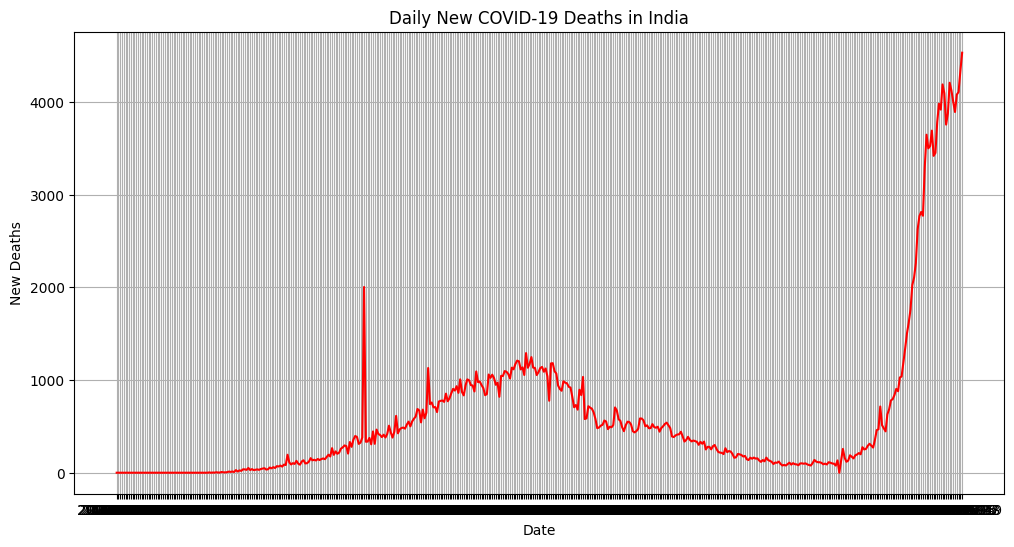

In [10]:
daily_deaths = df.groupby("Date")["Deaths"].sum().diff().fillna(0).reset_index()
daily_deaths.columns = ["Date", "New Deaths"]

plt.figure(figsize=(12, 6))
plt.plot(daily_deaths["Date"], daily_deaths["New Deaths"], color='red')
plt.title("Daily New COVID-19 Deaths in India")
plt.xlabel("Date")
plt.ylabel("New Deaths")
plt.grid(True)
plt.show()

## Analyze daily new recoveries

### Subtask:
Calculate and visualize the daily new recoveries across India.

**Reasoning**:
Calculate the daily new recoveries across India and plot the results.

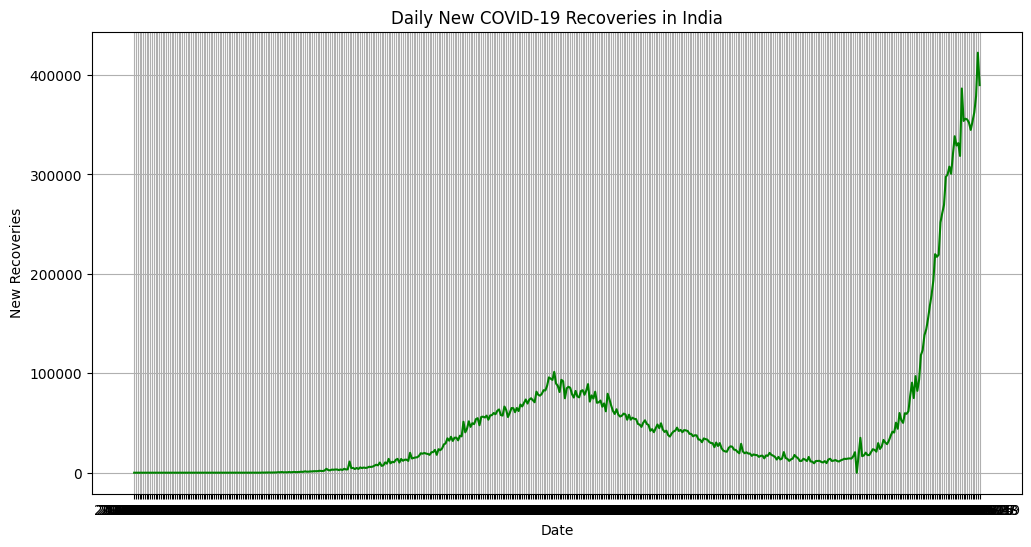

In [11]:
daily_cured = df.groupby("Date")["Cured"].sum().diff().fillna(0).reset_index()
daily_cured.columns = ["Date", "New Recoveries"]

plt.figure(figsize=(12, 6))
plt.plot(daily_cured["Date"], daily_cured["New Recoveries"], color='green')
plt.title("Daily New COVID-19 Recoveries in India")
plt.xlabel("Date")
plt.ylabel("New Recoveries")
plt.grid(True)
plt.show()

## Compare state-wise trends: Tamil Nadu vs. Karnataka

### Subtask:
Compare the trends of confirmed cases, deaths, and recoveries for Tamil Nadu and Karnataka.

**Reasoning**:
Filter the data for Tamil Nadu and Karnataka, and then plot the trends for confirmed cases, deaths, and recoveries for each state.

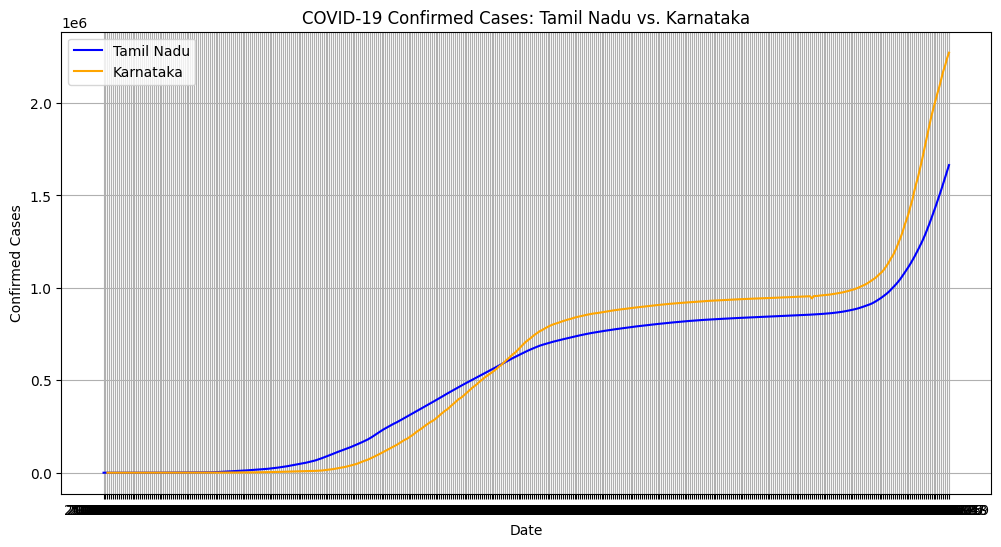

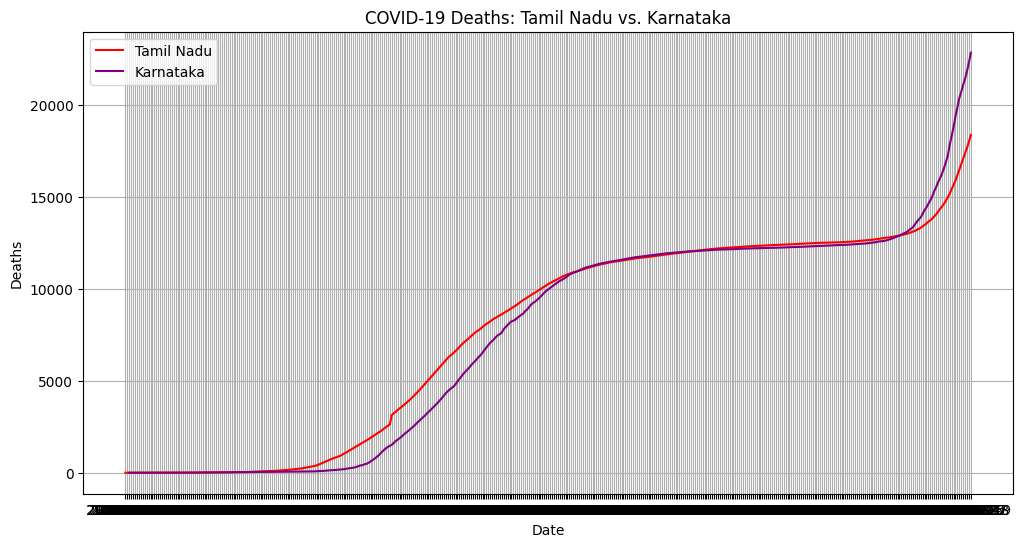

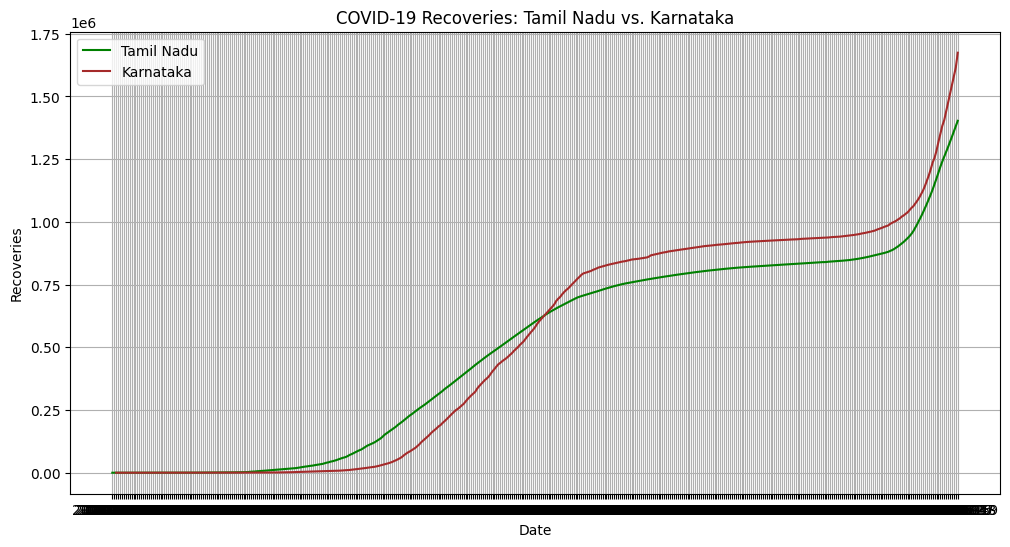

In [12]:
# Filter data for Tamil Nadu and Karnataka
tamil_nadu_df = df[df['State/UnionTerritory'] == 'Tamil Nadu'].groupby('Date')[['Confirmed', 'Deaths', 'Cured']].sum().reset_index()
karnataka_df = df[df['State/UnionTerritory'] == 'Karnataka'].groupby('Date')[['Confirmed', 'Deaths', 'Cured']].sum().reset_index()

# Plot Confirmed Cases
plt.figure(figsize=(12, 6))
plt.plot(tamil_nadu_df['Date'], tamil_nadu_df['Confirmed'], label='Tamil Nadu', color='blue')
plt.plot(karnataka_df['Date'], karnataka_df['Confirmed'], label='Karnataka', color='orange')
plt.title('COVID-19 Confirmed Cases: Tamil Nadu vs. Karnataka')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.grid(True)
plt.show()

# Plot Deaths
plt.figure(figsize=(12, 6))
plt.plot(tamil_nadu_df['Date'], tamil_nadu_df['Deaths'], label='Tamil Nadu', color='red')
plt.plot(karnataka_df['Date'], karnataka_df['Deaths'], label='Karnataka', color='purple')
plt.title('COVID-19 Deaths: Tamil Nadu vs. Karnataka')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.legend()
plt.grid(True)
plt.show()

# Plot Recoveries
plt.figure(figsize=(12, 6))
plt.plot(tamil_nadu_df['Date'], tamil_nadu_df['Cured'], label='Tamil Nadu', color='green')
plt.plot(karnataka_df['Date'], karnataka_df['Cured'], label='Karnataka', color='brown')
plt.title('COVID-19 Recoveries: Tamil Nadu vs. Karnataka')
plt.xlabel('Date')
plt.ylabel('Recoveries')
plt.legend()
plt.grid(True)
plt.show()

## Analyze active cases

### Subtask:
Calculate and visualize the number of active cases over time (Confirmed - Cured - Deaths).

**Reasoning**:
Calculate the daily active cases by subtracting the sum of 'Cured' and 'Deaths' from the 'Confirmed' cases, and then plot the results.

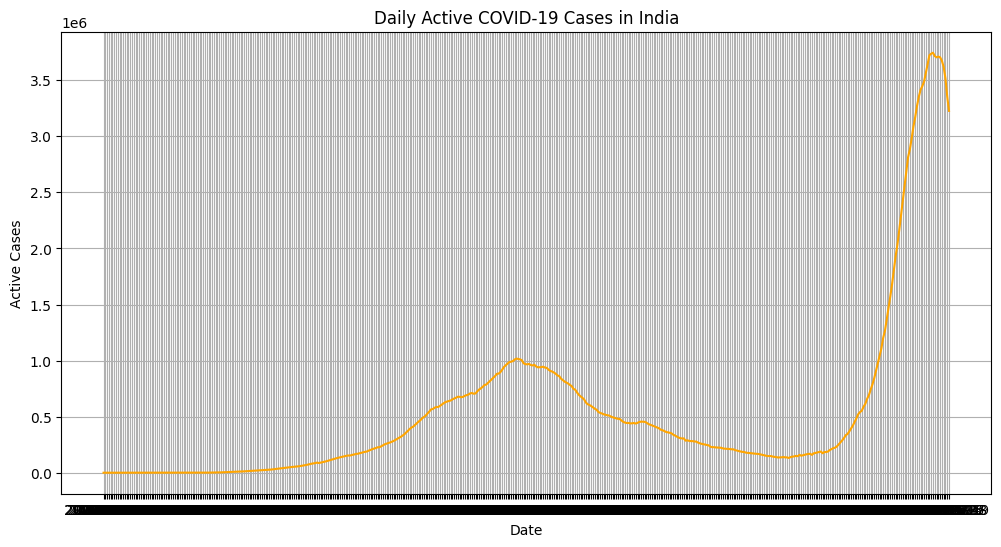

In [13]:
daily_active_cases = df.groupby("Date")["Confirmed"].sum() - df.groupby("Date")["Cured"].sum() - df.groupby("Date")["Deaths"].sum()
daily_active_cases = daily_active_cases.reset_index()
daily_active_cases.columns = ["Date", "Active Cases"]

plt.figure(figsize=(12, 6))
plt.plot(daily_active_cases["Date"], daily_active_cases["Active Cases"], color='orange')
plt.title("Daily Active COVID-19 Cases in India")
plt.xlabel("Date")
plt.ylabel("Active Cases")
plt.grid(True)
plt.show()

## Correlation analysis

### Subtask:
Analyze the correlation between different features like confirmed cases, deaths, and recoveries.

**Reasoning**:
Calculate and visualize the correlation matrix for 'Confirmed', 'Deaths', and 'Cured' columns to understand the relationships between these features.

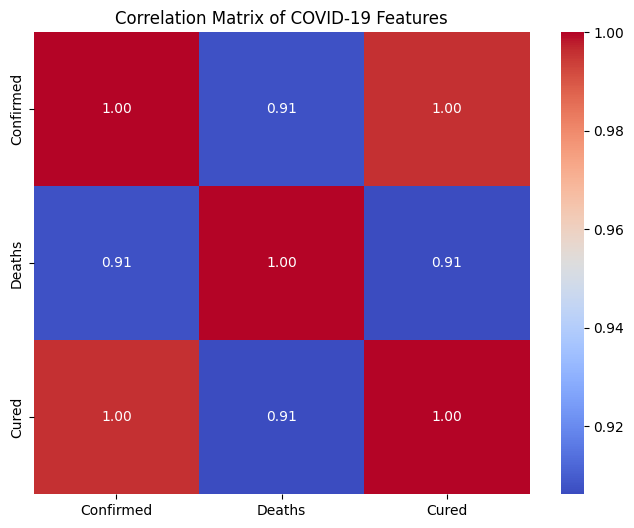

In [15]:
import seaborn as sns
# Calculate the correlation matrix
correlation_matrix = df[['Confirmed', 'Deaths', 'Cured']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of COVID-19 Features')
plt.show()

## Summary of Findings

Based on the analysis, we can observe the following trends and insights:

*   **Daily New Cases, Deaths, and Recoveries:** The plots for daily new cases, deaths, and recoveries show the fluctuations and peaks during different waves of the pandemic in India.
*   **State-wise Comparison (Tamil Nadu vs. Karnataka):** The plots comparing Tamil Nadu and Karnataka show the differences in the trends of confirmed cases, deaths, and recoveries between these two states.
*   **Active Cases:** The plot of active cases over time shows the overall progression of the pandemic and the burden on the healthcare system.
*   **Correlation Analysis:** The correlation matrix indicates a strong positive correlation between confirmed cases, deaths, and recoveries, which is expected as these metrics are related to the progression and outcome of the disease.

**Next Steps:**

*   Further analysis could involve exploring other features in the dataset, such as the distribution of cases by age or gender (if available).
*   More advanced analysis could include time series forecasting to predict future trends or statistical modeling to identify factors influencing the spread of the virus.
*   Interactive visualizations could be created to allow users to explore the data and insights in more detail.